In [13]:
import psycopg2
import pandas as pd
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns


# MATPLOTLIB PARAMETERS
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 7
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["font.size"] = 17
OVERALL_COLOR = "#565656"
NEUTRAL_COLOR = "#00a6e7"
A_COLOR = "#f78536"
B_COLOR = "#7ed3b2"
COLORS = [OVERALL_COLOR, A_COLOR, B_COLOR]

def get_data(query):
    database="test"
    username="postgres"
    password="postgres"
    hostname="localhost"
    sql = psycopg2.connect( host=hostname, user=username, password=password, dbname=database)
    
    df = pd.read_sql(query, sql)
    sql.close()
    return df


# CONTENT DATA

In [2]:
    query = "SELECT * FROM content_data;"
df_content = get_data(query).set_index("content_id")
df_content.head()

,market_id,content_type,content_title,content_year,user_rating,genres
content_id,,,,,,
15157,1,Movie,Noah,2014,6.3,Action | Adventure | Drama | Fantasy | Science...
28363,1,Movie,Samba,2014,6.7,Comedy | Drama
47308,1,Movie,Vengeance,2017,5.2,Action | Adventure | Drama | Thriller
14568,1,Movie,Runner Runner,2013,5.6,Action | Drama | Thriller
60974,2,Movie,The Neighbour,2018,5.7,Romance | Thriller


In [3]:
def create_genres_columns(df_content):
    all_genres = df_content["genres"].str.replace(" | ", " ", regex=False).str.split()
    genre_list = set([item for sublist in all_genres.tolist() for item in sublist] )

    for movie_type in genre_list:
        df_content[movie_type] = df_content["genres"].str.contains(movie_type)
        df_content[movie_type] = df_content[movie_type].astype(int)
        
    df_content.drop("genres", 1, inplace=True)

create_genres_columns(df_content)

In [138]:
df_content

,market_id,content_type,content_title,content_year,user_rating,War,Fantasy,Science,Comedy,Adventure,Drama,Romance,Action,Fiction,Thriller
content_id,,,,,,,,,,,,,,,
15157,1,Movie,Noah,2014,6.3,0,1,1,0,1,1,0,1,1,0
28363,1,Movie,Samba,2014,6.7,0,0,0,1,0,1,0,0,0,0
47308,1,Movie,Vengeance,2017,5.2,0,0,0,0,1,1,0,1,0,1
14568,1,Movie,Runner Runner,2013,5.6,0,0,0,0,0,1,0,1,0,1
60974,2,Movie,The Neighbour,2018,5.7,0,0,0,0,0,0,1,0,0,1
31680,1,Movie,Hyena Road,2015,6.5,1,0,0,0,0,1,0,0,0,0
53882,1,Movie,6 Below,2017,6.7,0,0,0,0,1,1,0,0,0,0


In [4]:
query = "SELECT * FROM content_position;"
df_position = get_data(query).set_index("content_id")
df_position.head()

,from_date,till_date,movie_position
content_id,,,
31680,2021-06-10 03:17:23,2021-06-11 03:15:01,72
47308,2021-06-10 03:17:23,2021-06-11 03:15:01,78
31680,2021-06-04 23:00:10,2021-06-10 03:16:03,57
47308,2021-06-11 03:15:02,9999-12-31 23:59:59,81
14568,2021-06-10 03:16:04,2021-06-11 03:15:01,42


In [6]:
df_position = df_position.reset_index().sort_values(by=[ "content_id", "till_date"], ascending=True)
df_position["lost_positions"] = df_position["movie_position"].diff(1)
df_position.loc[df_position["content_id"].shift(1)!=df_position["content_id"], "lost_positions"] = np.nan
df_position

,index,content_id,from_date,till_date,movie_position,lost_positions
0,10,14568,2021-05-31 23:00:15,2021-06-10 03:16:03,27,NaN
1,4,14568,2021-06-10 03:16:04,2021-06-11 03:15:01,42,15.0
2,8,14568,2021-06-11 03:15:02,9999-12-31 23:59:59,45,3.0
3,20,15157,2021-06-04 23:00:10,2021-06-10 03:16:03,52,NaN
4,19,15157,2021-06-10 03:16:04,2021-06-11 03:15:01,67,15.0
5,5,15157,2021-06-11 03:15:02,9999-12-31 23:59:59,70,3.0
6,18,28363,2021-05-17 05:33:29,2021-06-10 03:16:03,3,NaN
7,11,28363,2021-06-10 03:16:04,2021-06-11 03:15:01,18,15.0
8,7,28363,2021-06-11 03:15:02,9999-12-31 23:59:59,21,3.0
9,2,31680,2021-06-04 23:00:10,2021-06-10 03:16:03,57,NaN


# PLAYS DATA

In [10]:
query = (
    "SELECT "
    "plays.play_id, "
    "content_data.content_id, "
    "content_title, "
    "DATE_TRUNC( 'hour', created_at ) AS play_date, "
    "CAST(viewtime_ms AS FLOAT)/1000/60 AS viewtime_mts, "
    "revenue "
    "FROM plays "
    "LEFT JOIN plays_duration ON plays_duration.play_id = plays.play_id "
    "LEFT JOIN revenue_generated ON revenue_generated.play_id = plays.play_id "
    "INNER JOIN content_data ON plays.content_id = CAST(content_data.content_id as int) "
)
df_plays = get_data(query).set_index("play_id")
df_plays.head()

,content_id,content_title,play_date,viewtime_mts,revenue
play_id,,,,,
764c243b859368d3b1c6b76efd1e1646c0253fe1e2a009145c212d5833d377cb,14568,Runner Runner,2021-06-11 19:00:00,1.018717,4.49
f9ac92c31615ce90f7080e2427d36db379181db48efea7eab157a75903dcd67e,60974,The Neighbour,2021-06-11 20:00:00,111.967333,3.99
8a38b004cdd83a6aff46e47ef9914ce931bfa26843542ff7b52e9d5099ad75bb,47308,Vengeance,2021-06-11 11:00:00,1.126850,4.99
a8164ecd0ba2add666b26ef9517980d29b28453982c9697477b1ce2531a2066d,47308,Vengeance,2021-06-11 22:00:00,91.832500,3.99
df7ba85384ea4cabe8c73a44182c63ca9c79c698bfbf02294e91abd7336f7229,31680,Hyena Road,2021-06-11 11:00:00,138.320017,3.99


In [11]:
df_plays["hour"] = df_plays["play_date"].dt.hour
df_plays["weekday"] = df_plays["play_date"].dt.day_name()
df_plays["weekday_order"] = df_plays["play_date"].dt.dayofweek
df_plays["viewtime_hours"] = df_plays["viewtime_mts"]/60
df_plays["views"] = 1
df_plays.to_excel("plays.xlsx")
df_plays.head()

,content_id,content_title,play_date,viewtime_mts,revenue,hour,weekday,weekday_order,viewtime_hours,views
play_id,,,,,,,,,,
764c243b859368d3b1c6b76efd1e1646c0253fe1e2a009145c212d5833d377cb,14568,Runner Runner,2021-06-11 19:00:00,1.018717,4.49,19,Friday,4,0.016979,1
f9ac92c31615ce90f7080e2427d36db379181db48efea7eab157a75903dcd67e,60974,The Neighbour,2021-06-11 20:00:00,111.967333,3.99,20,Friday,4,1.866122,1
8a38b004cdd83a6aff46e47ef9914ce931bfa26843542ff7b52e9d5099ad75bb,47308,Vengeance,2021-06-11 11:00:00,1.126850,4.99,11,Friday,4,0.018781,1
a8164ecd0ba2add666b26ef9517980d29b28453982c9697477b1ce2531a2066d,47308,Vengeance,2021-06-11 22:00:00,91.832500,3.99,22,Friday,4,1.530542,1
df7ba85384ea4cabe8c73a44182c63ca9c79c698bfbf02294e91abd7336f7229,31680,Hyena Road,2021-06-11 11:00:00,138.320017,3.99,11,Friday,4,2.305334,1


### PRIME TIME

In [12]:
prime_time = {}

views_prime_time = df_plays.groupby(["weekday", "hour"])["content_id"].count().idxmax()
prime_time["views_prime_time"] = views_prime_time
prime_time["views_prime_time"] = f"{views_prime_time[0]} at {views_prime_time[1]}"
print(prime_time)

{'views_prime_time': 'Saturday at 19'}


### ABSTRACT METRICS

In [175]:
total =  df_plays.groupby("play_date")[["views", "viewtime_mts","revenue", "viewtime_hours"]].sum().sum()
total.name = "total"
df_abstract = total.to_frame()

by_hour = df_plays.groupby("play_date")[["views", "viewtime_mts","revenue", "viewtime_hours"]].sum().sum()
df_abstract["by_hour_total"] = by_hour
by_hour = df_plays.groupby("play_date")[["views", "viewtime_mts","revenue", "viewtime_hours"]].sum().mean()
df_abstract["by_hour_mean"] = by_hour

by_day = df_plays.groupby(df_plays["play_date"].dt.floor("d"))[["views", "viewtime_mts","revenue", "viewtime_hours"]].sum().mean()
df_abstract["by_day_total"] = by_day
by_day = df_plays.groupby(df_plays["play_date"].dt.floor("d"))[["views", "viewtime_mts","revenue", "viewtime_hours"]].sum().mean()
df_abstract["by_day_mean"] = by_day

df_abstract.T.to_excel("abstract.xlsx")
df_abstract.T

,views,viewtime_mts,revenue,viewtime_hours
total,5678.000000,263351.123083,26402.040,4389.185385
by_hour_total,5678.000000,263351.123083,26402.040,4389.185385
by_hour_mean,33.797619,1567.566209,157.155,26.126103
by_day_total,811.142857,37621.589012,3771.720,627.026484
by_day_mean,811.142857,37621.589012,3771.720,627.026484


### REVENUE VS VIEWTIME

 IS VIEWTIME AND REVENUE CORRELATED?

<AxesSubplot:xlabel='revenue', ylabel='viewtime_mts'>

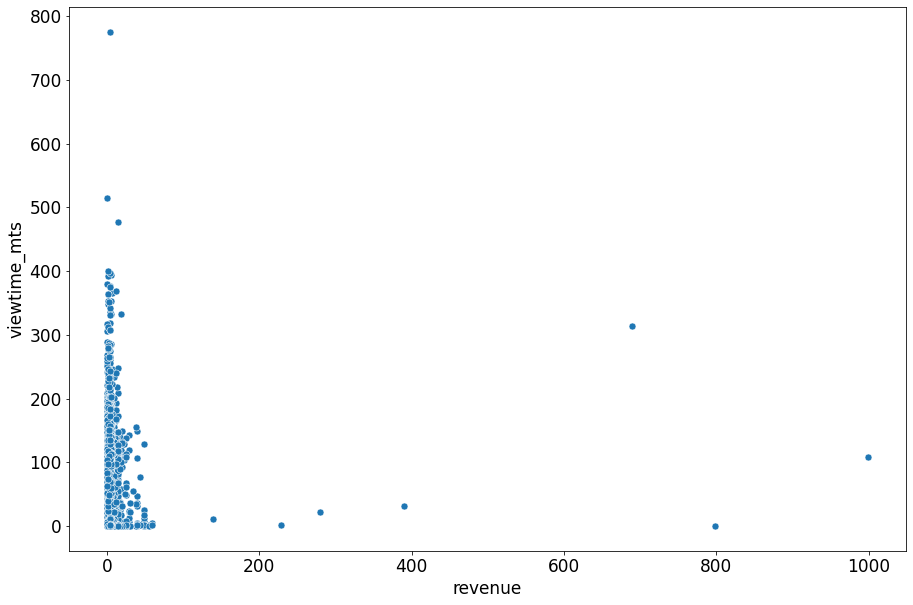

In [14]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_plays, x="revenue", y="viewtime_mts")

Eventhough we expect to have more revenue for more viewtime (more commercials), it doen't seem to be correlated. There are some outliers outlier out there, let's explore them

In [148]:
# HOW FREQUENT IS A REVENUE?
revenue_frequency = (((((df_plays["revenue"]/10).round()*10).value_counts())/len(df_plays)).sort_index()*100)
revenue_frequency.name="revenue_frequency"
revenue_frequency.to_frame()

,revenue_frequency
0.0,86.491722
10.0,11.359634
20.0,1.197605
30.0,0.228954
40.0,0.317013
50.0,0.246566
60.0,0.035224
140.0,0.017612
230.0,0.017612
280.0,0.017612


Only 0.03% of the records have a revenue are greater than 60€. We can ignore them for the analysis.

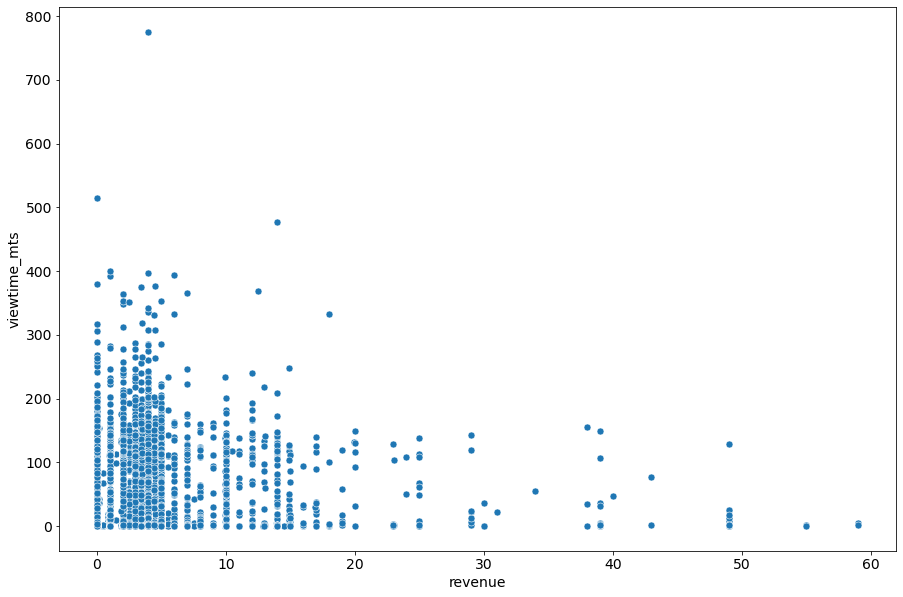

In [149]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_plays[df_plays["revenue"] < 60], x="revenue", y="viewtime_mts")
plt.show()

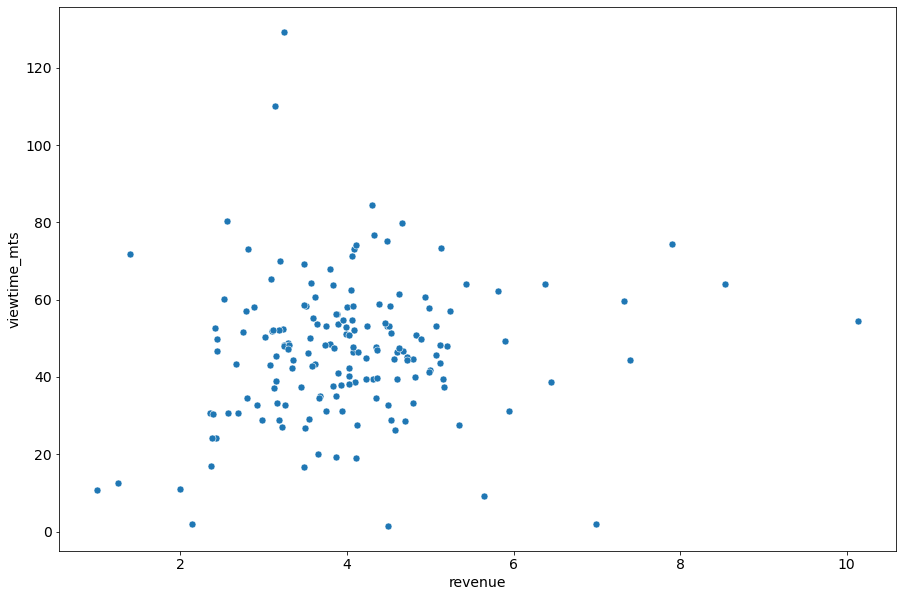

In [160]:
grouped_by_hour = df_plays[(df_plays["revenue"] < 60) & (df_plays["viewtime_mts"] < 500)].groupby("play_date").mean()
plt.figure(figsize=(15,10))
sns.scatterplot(data=grouped_by_hour, x="revenue", y="viewtime_mts")
plt.show()

After dropping outliers and compute the mean by day-hour viewtime and revenue to check if they are correlated we can't conclude that they aren't correlated

In [12]:
query = (
    "SELECT "
    "content_data.content_id, "
    "MIN(content_data.content_title) as content_title,  "
    "SUM(revenue_generated.revenue) total_revenue, "
    "COUNT(plays.play_id) as n_plays,  "
    "SUM(revenue_generated.revenue)/COUNT(plays.play_id) AS revenue_plays_ratio "
    "FROM plays "
    "INNER JOIN	revenue_generated ON plays.play_id = revenue_generated.play_id "
    "INNER JOIN content_data ON plays.content_id = CAST(content_data.content_id as int) "
    "GROUP BY content_data.content_id "
    "ORDER BY total_revenue DESC "
)
df_abstract = get_data(query).set_index("content_id")
df_abstract.head()

,content_title,total_revenue,n_plays,revenue_plays_ratio
content_id,,,,
53882,6 Below,5689.52,1160,4.904759
60974,The Neighbour,4513.76,973,4.639013
15157,Noah,3642.86,878,4.149043
47308,Vengeance,3640.50,778,4.679306
31680,Hyena Road,3350.72,750,4.467627
